<a href="https://colab.research.google.com/github/weathon/kNN_Research/blob/main/Simple_2D_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import autograd.numpy as np
from autograd import grad

In [2]:
def f(x):
  return (x-50)**2

In [22]:
# generate data
import random
X = []
Y = []
label = []
for i in range(400):
  x = np.random.uniform()*100
  y = np.random.uniform()*100
  X.append([x,y])
  if y>f(x):
    Y.append(1)
  else:
    Y.append(0)

In [23]:
X = np.array(X)
Y = np.array(Y)
indexs = np.arange(len(X))

def train_step(A, k):
  global X,Y, accuracy

  r = int(len(X)*0.9)
  #kunoukoukeduziheisright?kunduzikun zhe gee shi qu 0.8 meiciyifong 0.1?xkou hmiande 0.2 kunkouke zheyag gaicheng 0.9 zhihou yiranconverge 
  npX = np.array(X[:r])
  npY = np.array(Y[:r])
  X_val = np.array(X[r:])
  Y_val = np.array(Y[r:])

  error = 0
  # TruePositives = 0
  # FalseNegatives = 0
  # FalsePositives = 0
  # TrueNegatives = 0
  MSE = 0.0

  for sample in range(len(X)-r): 
    distance = np.sum(A*(npX - X_val[sample])**2,axis=1) 
    sum0 = 0
    sum1 = 0
    mins = np.argsort(distance)[:k]
    sum0 += np.sum(1/(distance[mins]+1))
    sum1 += np.sum(1/(distance[mins]+1) * (npY[mins]))

    MSE += (sum1/sum0-Y_val[sample])**2

  return  MSE/(len(X)-r)

In [24]:
def d(A):
  return train_step(abs(A),30)
train_grad = grad(d)

In [25]:
def X_shuffle(X):
  return np.append(X[len(X)//10:,:],X[:len(X)//10,:],axis=0)

def shuffle(X):
  return np.append(X[len(X)//10:],X[:len(X)//10])

In [30]:
np.random.shuffle(indexs)
A = np.array([1.0,1.0])
losses = []
for epoches in range(30): 
  losssum = 0
  for batch in range(10):
    slope = train_grad(A)
    A-=slope*0.5
    loss = train_step(A,30) 
    losssum+=loss
    shuffle(indexs) 
    X = X[indexs]
    Y = Y[indexs] 
  losses.append(losssum)
  print(losssum)
 # kouke toutongfaruansm gui chongxin run yiciyoukeyile congtou koukeshangcide hshi random shuffleguode? xianshuffle zai shoushuffledoubuxing?tttxkou christianwaimianoke
 # kouke IT IS RIGHT, EVEN IF I JUST SHUFFLE AT THE BEGINING, IT WONT WORK!

 # xkoukunkouekxkoutamenwaimianhenhuang whywhwywxjkotxtiaott

0.38831288826332233
0.34273075185852353
0.3230265542165263
0.29777256856188716
0.2670926394609414
0.25827509007020516
0.22107171415293414
0.2879242699927068
0.2502094305343331
0.2290107856682473
0.29283291023870317
0.2588614948113741
0.34671879760379365
0.19878609758888796
0.2750595593942301
0.2464519428883602
0.2632137463250076
0.21020851447577268
0.23735495651082678
0.1928235992058427
0.1565995663399285
0.23180823827227953
0.5190166200487862
1.1530930582349526
1.007576841586979
0.8583799985590578
0.49167426556118987
0.34034713226559016
0.3297718562550732
0.39891489839759137


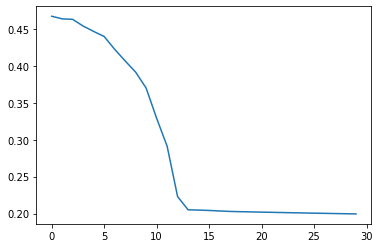

In [27]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [28]:
A

array([1.69310372, 0.03545942])